# Определение потенциально популярной компьютерной игры

_____________________

##### Шаг 1. Изучение общей информации
* [Загрузка библиотек, получение общей информации, изучение данных на дубликаты и пропущенные значения](#section1)

##### Шаг 2. Подготовка данных
* [Приведение данных к нужным типам, добавление столбца с суммарными продажами](#section2)

##### Шаг 3.  Исследовательский анализ данных
* [Определение платформ с наибольшими суммарными продажами, построение распределения по годам](#section3)
* [Построение диаграмм размаха глобальным продажам игр в разбивке по платформам](#section4)
* [Построение диаграмм рассеяния и подсчет корреляций между отзывами и продажами](#section5)
* [Изучение распределеня игр по жанрам](#section6)

##### Шаг 4. Составление портрета пользователя регионов
* [Определение для регионов топ-5 самых популярных платформ](#section7)
* [Определение для регионов топ-5 самых популярных жанров](#section8)
* [Изучение влияния рейтинга ESRB на продажи в отдельном регионе](#section9)

##### Шаг 5. Проверка гипотез
* [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#section10)
* [Средние пользовательские рейтинги жанров Action и Sports разные](#section11)

##### Шаг 6. Общий вывод
*[Описание выявленных закономерностей успешности игры](#section12)

### Описание проекта
В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.
Выявим закономерности, определяющие успешность игры, чтобы спланировать рекламные кампании.

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Изучение общей информации <a id='section1'></a>

Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
# Иммпортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Читаем информацию
data_games = pd.read_csv('dataset/games.csv')
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Приводим названия столбцов к нижнему регистру
data_games.columns = data_games.columns.str.lower()
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Смотрим информацию о данных и проверяем дубликаты
data_games.info()
data_games.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


0

In [6]:
# Проверяем пропущенные значения
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#Смотрим уникальные значения в столбце с пользовательским рейтингом
data_games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.9       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [8]:
#Смотрим уникальные значения в столбце с годом выпуска
data_games['year_of_release'].value_counts().sort_index(ascending=False)

2016.0     502
2015.0     606
2014.0     581
2013.0     544
2012.0     653
2011.0    1136
2010.0    1255
2009.0    1426
2008.0    1427
2007.0    1197
2006.0    1006
2005.0     939
2004.0     762
2003.0     775
2002.0     829
2001.0     482
2000.0     350
1999.0     338
1998.0     379
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1992.0      43
1991.0      41
1990.0      16
1989.0      17
1988.0      15
1987.0      16
1986.0      21
1985.0      14
1984.0      14
1983.0      17
1982.0      36
1981.0      46
1980.0       9
Name: year_of_release, dtype: int64

#### Вывод
В таблице 11 столбцов. Значения в столбце пользовательским рейтингом будем переводить в численный тип данных. В данных есть пропущенные значения в значениях рейтинга, оценок пользователей и критиков, годах выпусках и названиях компьютерной игры.
Возможно некоторым играм не были проставлены оценки и рейтинг. В значениях с пользовательским рейтингом также встречается объект tbd (to be determinated), значит рейтинг еще не проставлен. Значения в столбце с годом выпуска возможно были пропущены, так как не были известны, игра может выпускаться на разных платформах в разные года. Пропуски составляют 1,6%, это немного, поэтому принято решение их не заполнять. Названия столбцов переведены в нижний регистр. Данные представлены с 1980 по 2016 год.

## Шаг 2. Подготовка данных <a id='section2'></a>

In [9]:
# Приводим значения в столбце с пользовательским рейтингом к численному типу данных
# Зеачение tbd (to be determinated) заменяем на пропуски, так как рейтинг не определен
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce') 

In [10]:
# Создаем столбец с суммарными продажами во всех регионах
data_games['sum_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Вывод
Значения в столбце пользовательским рейтингом переведены в численный тип данных. 
Создан столбец с суммарными продажами во всех регионах

## Шаг 3. Исследовательский анализ данных <a id='section3'></a>

In [11]:
# Cмотрим количество выпусков игр по годам
data_games['year_of_release'].value_counts().sort_index(ascending=False)

2016.0     502
2015.0     606
2014.0     581
2013.0     544
2012.0     653
2011.0    1136
2010.0    1255
2009.0    1426
2008.0    1427
2007.0    1197
2006.0    1006
2005.0     939
2004.0     762
2003.0     775
2002.0     829
2001.0     482
2000.0     350
1999.0     338
1998.0     379
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1992.0      43
1991.0      41
1990.0      16
1989.0      17
1988.0      15
1987.0      16
1986.0      21
1985.0      14
1984.0      14
1983.0      17
1982.0      36
1981.0      46
1980.0       9
Name: year_of_release, dtype: int64

In [12]:
# Смотрим суммарные продажи по платформам
data_games.groupby('platform')['sum_sales'].sum().sort_values(ascending=False) 

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

In [13]:
# Формируем список платформ с суммарными продажами > 200 млн. долларов 
data_top = (data_games.groupby('platform')
            .agg({'sum_sales': 'sum'})
            .query('sum_sales > 200')
            .sort_values(by='sum_sales', ascending=False)
           )
data_top

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [14]:
# Делаем срез по платформам с суммарными продажами > 200 млн. долларов
data_games.query('platform in @data_top.index').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [15]:
# Формируем сводную таблицу с прибыльными платформами по годам, пропуски заполняем 0
(data_games
 .query('platform in @data_top.index')
 .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
 .fillna(0)
)

platform,3DS,DS,GB,GBA,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,X360,XB
year_of_release,,,,,,,,,,,,,,,,
1983.0,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984.0,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985.0,0.00,0.02,0.00,0.00,0.00,53.44,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986.0,0.00,0.00,0.00,0.00,0.00,36.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987.0,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988.0,0.00,0.00,1.43,0.00,0.00,45.01,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1989.0,0.00,0.00,64.97,0.00,0.00,7.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1990.0,0.00,0.00,4.89,0.00,0.00,15.73,0.00,0.00,0.00,0.00,0.00,0.00,26.15,0.00,0.00,0.00
1991.0,0.00,0.00,5.57,0.00,0.00,6.11,0.00,0.00,0.00,0.00,0.00,0.00,16.22,0.00,0.00,0.00


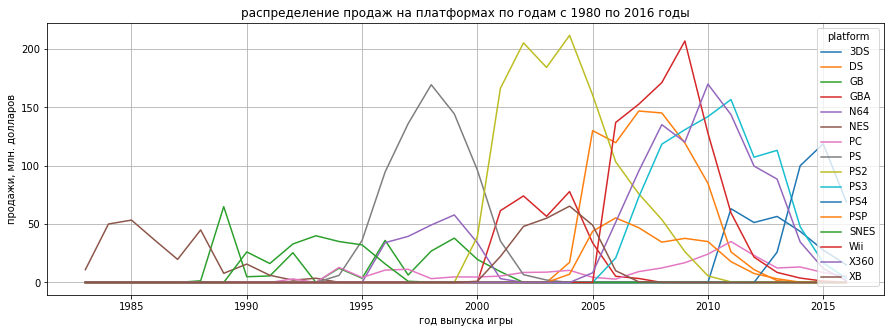

In [16]:
# Строим распределение продаж на платформах по годам 

(data_games
 .query('platform in @data_top.index')
 .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
 .fillna(0)
 .plot(grid=True, figsize=(15, 5), title='распределение продаж на платформах по годам с 1980 по 2016 годы')
)
plt.xlabel('год выпуска игры')
plt.ylabel('продажи, млн. долларов');


Получили, что платформы появляются и исчезают примерно за ~10 лет, тогда, чтобы сделать прогноз на 2017 год примем актуальный период > 2007

In [17]:
# Выделяем платформы за актуальный срок
data_games.query('year_of_release > 2007').groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS3     837.19
X360    805.96
Wii     601.26
DS      388.60
PS4     314.14
3DS     257.81
XOne    159.32
PC      151.29
PSP     136.38
PS2      86.39
WiiU     82.19
PSV      53.81
XB        0.18
DC        0.04
Name: sum_sales, dtype: float64

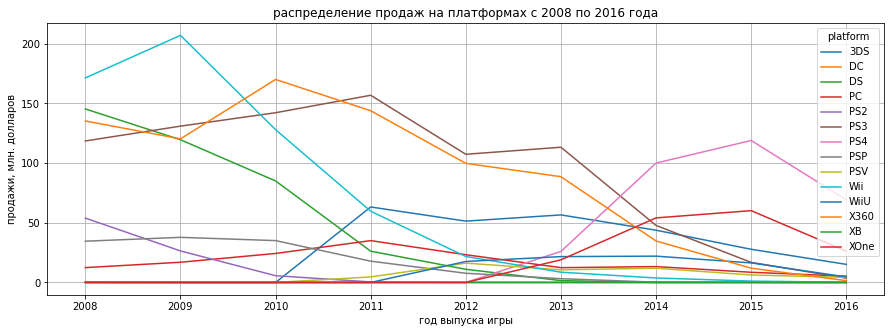

In [18]:
# Распределение для платформ за актуальный период
data_period_grouped = (
    data_games
    .query('year_of_release > 2007')
    .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
    .fillna(0)
)
data_period_grouped.plot(grid=True, figsize=(15, 5), title='распределение продаж на платформах c 2008 по 2016 года')
plt.xlabel('год выпуска игры')
plt.ylabel('продажи, млн. долларов');

Продажи на платформах PS3, X360, Wii, DS, PC, PSP, PS2, WiiU, PSV, XB и DC падают на 2016 год, а на платформах PS4, XOne и 3DS на 2016 год растут, поэтому, если учитывать, что они только набирают популярность, данные платформы являются потенциально прибыльными. C 2008 по 2013 год самыми прибыльными были платформы: Wii, PS3, X360.

<a id='section4'></a>

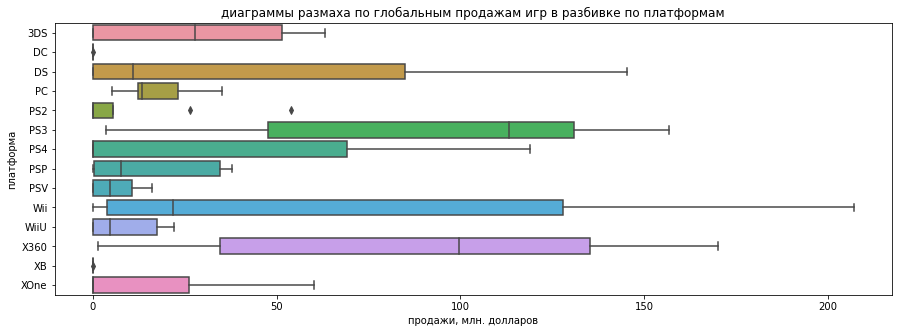

In [19]:
# Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам 
plt.figure(figsize=(15, 5))
sns.boxplot(data=data_period_grouped, orient='h')
plt.xlabel('продажи, млн. долларов')
plt.ylabel('платформа')
plt.title('диаграммы размаха по глобальным продажам игр в разбивке по платформам');

По диаграмме видно, что на платформе Wii встречаются самые дорогие продажи, но медиана смещена влево, значит они встречаются редко. На платформе X360, медиана смещена вправо, и она больше среднего, значит на данной платформе много продаж со средней суммой в 100 млн. долларов. На платформе PS3, которая лидирует по суммарным продажам игр, медиана смещена еще правее, значит на ней много продаж выше среднего. 

In [20]:
# Формируем новую таблицу, в которой не будем учитывать данные за предыдущие годы
data_games_period = data_games.query('year_of_release > 2007')
data_games_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


<a id='section5'></a>

In [21]:
# Делаем срез по популярной платформе PS3
data_PS3 = data_games_period.query('platform == "PS3"')
data_PS3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010.0,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


In [22]:
# Чтобы узнать, как влияют на продажи внутри платформы PS3 отзывы пользователей и критиков, находим корреляцию
data_PS3['sum_sales'].corr(data_PS3['user_score'])

0.11507962414430675

In [23]:
# Чтобы узнать, как влияют на продажи внутри платформы PS3 отзывы пользователей и критиков, находим корреляцию
data_PS3['sum_sales'].corr(data_PS3['critic_score'])

0.43373151728268966

In [24]:
# Также находим корреляцию 
data_games_period['sum_sales'].corr(data_games_period['user_score'])

0.08475193684480462

In [25]:
# Также находим корреляцию 
data_games_period['sum_sales'].corr(data_games_period['critic_score'])

0.2941306948510803

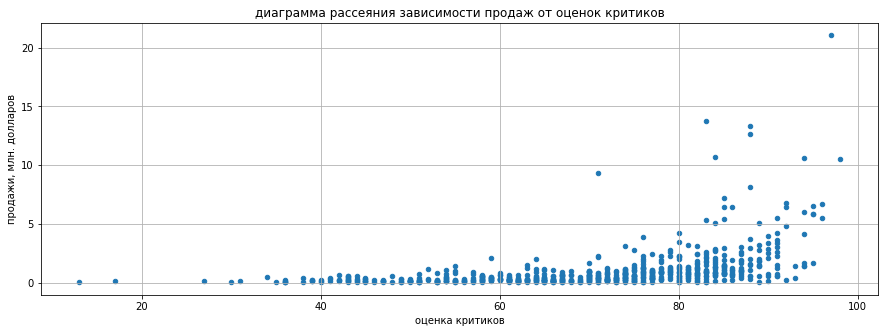

In [26]:
# Значения оценок не связаны между собой, строим диаграмму рассеяния зависимости продаж от оценок критиков
data_PS3.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(15, 5), grid=True)
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн. долларов')
plt.title('диаграмма рассеяния зависимости продаж от оценок критиков');

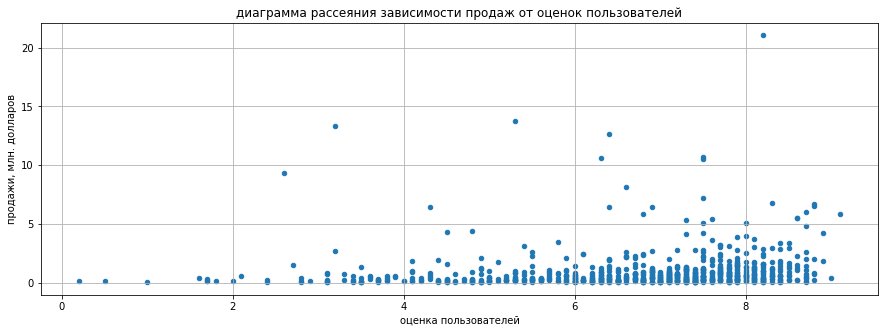

In [27]:
# Строим диаграмму рассеяния зависимости продаж от оценок пользователей
data_PS3.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(15, 5), grid=True)
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн. долларов')
plt.title('диаграмма рассеяния зависимости продаж от оценок пользователей');

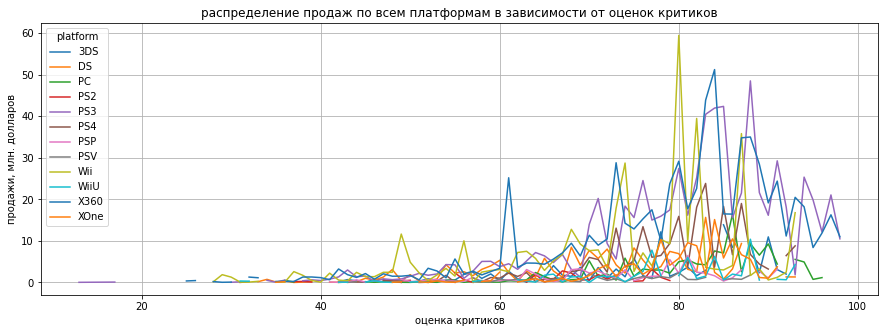

In [28]:
# Строим график зависимости продаж по всем платформам от оценок критиков
(data_games_period
 .pivot_table(index='critic_score', columns='platform', values='sum_sales', aggfunc='sum')
 .plot(figsize=(15, 5), grid=True, title='распределение продаж по всем платформам в зависимости от оценок критиков')
)
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн. долларов');

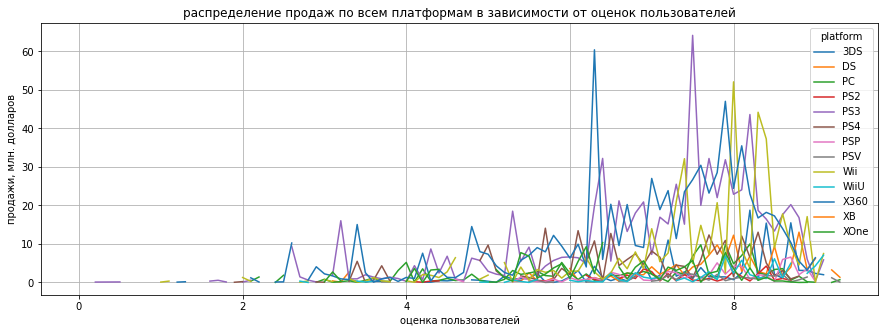

In [29]:
# Строим график зависимости продаж по всем платформам от оценок пользователей
(data_games_period
 .pivot_table(index='user_score', columns='platform', values='sum_sales', aggfunc='sum')
 .plot(figsize=(15, 5), grid=True, title='распределение продаж по всем платформам в зависимости от оценок пользователей')
)
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн. долларов');

В результате расчета корреляции получили прямую зависимость продаж от оценок, отзывы критиков влияют сильнее как внутри одной популярной платформы, так и для всех остальных платформ. По диаграммам рассеяния и графикам видно, что продажи игр возрастают с ростом оценки.

<a id='section6'></a>

In [30]:
# Формируем сводную таблицу игр по жанрам

data_games_period.pivot_table(index='genre', values='sum_sales', aggfunc='sum')

,sum_sales
genre,
Action,945.74
Adventure,105.86
Fighting,148.51
Misc,396.43
Platform,195.38
Puzzle,55.62
Racing,226.41
Role-Playing,421.57
Shooter,608.19


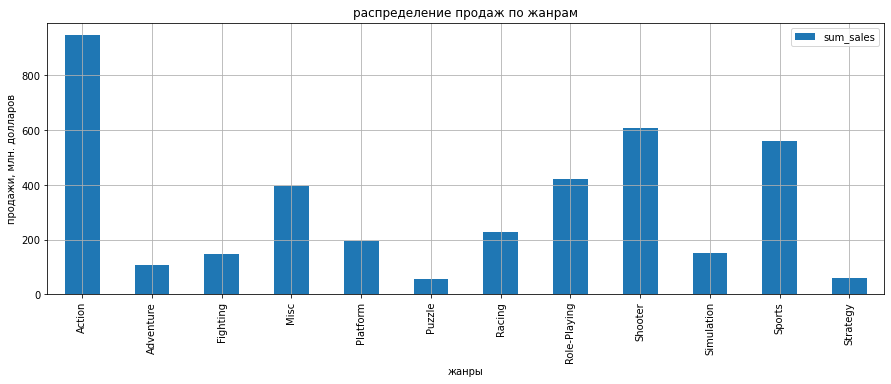

In [31]:
# Строим распределение продаж по жанрам
(data_games_period
 .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(15, 5), grid=True, title='распределение продаж по жанрам')
)
plt.xlabel('жанры')
plt.ylabel('продажи, млн. долларов');

Самый прибыльный жанр игр Action.

#### Вывод
Определены платформы с наибольшими суммарными продажами и постройены распределения по годам. Определен актуальный период, чтобы сделать прогноз на 2017 год, с 2008 по 2016 год.
Сформирована новая таблица с продажами игр за актуальный период.
Выявлено, что продажи на платформах PS3, X360, Wii, DS, PC, PSP, PS2, WiiU, PSV, XB и DC падают на 2016 год, а на платформах PS4, XOne и 3DS на 2016 год растут, поэтому, если учитывать, что они только набирают популярность, данные платформы являются потенциально прибыльными. C 2008 по 2013 год самыми прибыльными были платформы: Wii, PS3, X360.
Построены графики диаграммы размаха по глобальным продажам игр в разбивке по платформам. Выявлено, что на платформе Wii встречаются самые дорогие продажи, но медиана смещена влево, значит они встречаются редко. На платформе X360, медиана смещена вправо, и она больше среднего, значит на данной платформе много продаж со средней суммой ~ в 100 млн. долларов. На платформе PS3, которая лидирует по суммарным продажам игр, медиана смещена еще правее, значит на ней много продаж выше среднего. 
Проанализировано, как влияют на продажи внутри платформы PS3 отзывы пользователей и критиков. Построена диаграмма рассеяния и посчитаны корреляции между отзывами и продажами. В результате расчета корреляции получили прямую зависимость продаж от оценок, отзывы критиков влияют сильнее как внутри одной популярной платформы, так и для всех остальных платформ. По диаграммам рассеяния и графикам  также видно, что продажи игр возрастают с ростом оценки как внутри одной популярной платформы, так и для всех остальных платформ.
Построены график распределения игр по жанрам. Выявлено, что самый популярный жанр: Action.

## Шаг 4. Составление портрета пользователя регионов <a id='section7'></a>

In [32]:
data_games_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


In [33]:
# топ-5 cамых популярных платформ для Северной Америки
(data_games_period
 .pivot_table(index= 'platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head()
)

,na_sales
platform,
X360,490.69
PS3,349.13
Wii,332.87
DS,198.73
PS4,108.74


In [34]:
# топ-5 cамых популярных платформ для Европы 
(data_games_period
 .pivot_table(index= 'platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head()
)

,eu_sales
platform,
PS3,293.73
X360,234.88
Wii,170.74
PS4,141.09
PC,92.17


In [35]:
# топ-5 cамых популярных платформ для Японии
(data_games_period
 .pivot_table(index= 'platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head()
)

,jp_sales
platform,
3DS,100.62
DS,76.12
PS3,74.11
PSP,60.46
Wii,47.01


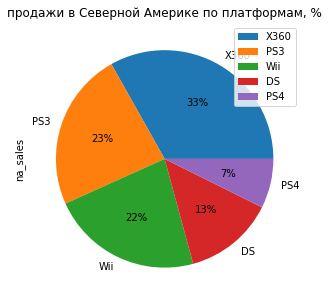

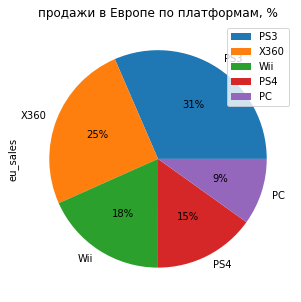

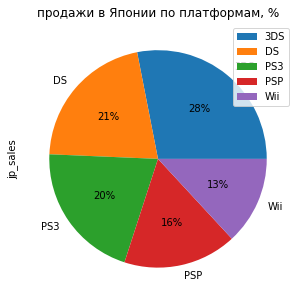

In [36]:
# топ-5 cамых популярных платформ для Северной америки, Европы и Японии
(data_games_period
 .pivot_table(index= 'platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head()
 .plot(y='na_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
)
plt.title('продажи в Северной Америке по платформам, %');

(data_games_period
 .pivot_table(index= 'platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head()
 .plot(y='eu_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
)
plt.title('продажи в Европе по платформам, %');
(data_games_period
 .pivot_table(index= 'platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head()
 .plot(y='jp_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
)
plt.title('продажи в Японии по платформам, %');

В Северной Америке самая популярная платформа X360, в Европе - PS3, в Японии - 3DS. В регионе Северная Америка самые большие продажи.

<a id='section8'></a>

In [37]:
# топ-5 cамых популярных жанров для Северной Америки
(data_games_period
 .pivot_table(index= 'genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head()
)

,na_sales
genre,
Action,433.74
Shooter,311.26
Sports,276.27
Misc,211.61
Role-Playing,155.81


In [38]:
# топ-5 cамых популярных жанров для Европы
(data_games_period
 .pivot_table(index= 'genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head()
)

,eu_sales
genre,
Action,310.59
Shooter,208.35
Sports,185.19
Misc,107.00
Role-Playing,94.46


In [39]:
# топ-5 cамых популярных жанров для Японии
(data_games_period
 .pivot_table(index= 'genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head()
)

,jp_sales
genre,
Role-Playing,138.12
Action,90.16
Misc,37.33
Sports,30.69
Adventure,23.36


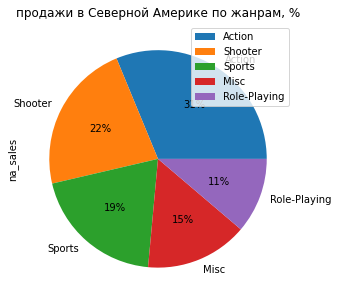

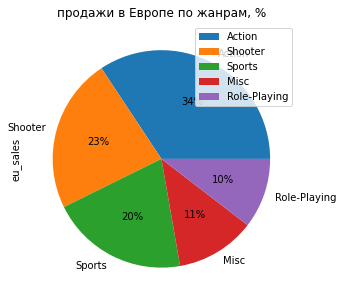

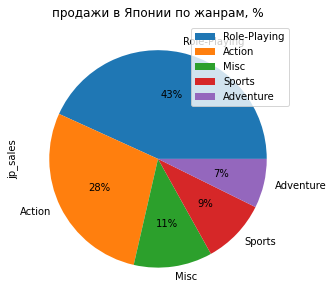

In [40]:
# топ-5 cамых популярных жанров для Северной америки, Европы и Японии
(data_games_period
 .pivot_table(index= 'genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head()
 .plot(y='na_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
)
plt.title('продажи в Северной Америке по жанрам, %');

(data_games_period
 .pivot_table(index= 'genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head()
 .plot(y='eu_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
)
plt.title('продажи в Европе по жанрам, %');
(data_games_period
 .pivot_table(index= 'genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head()
 .plot(y='jp_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
)
plt.title('продажи в Японии по жанрам, %');

В Северной Америке самый популярный жанр игр Action, в Европе - Action, в Японии - Role-Playing, на втором месте -  Action. Возможно это связано с Японской культурой и любовью к персонажам аниме. 

<a id='section9'></a>

In [41]:
# Определим влияние рейтинга ESRB на продажи по регионам. Для этого отбросим пропущенные значения и сформируем сводную таблицу
data_games_rating = (
    data_games_period
    .dropna(subset=['rating'])
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
data_games_rating.head()

,eu_sales,jp_sales,na_sales
rating,,,
E,326.61,77.17,536.93
E10+,144.53,25.67,251.88
EC,0.00,0.00,1.32
M,362.65,39.33,502.60
RP,0.03,0.00,0.00


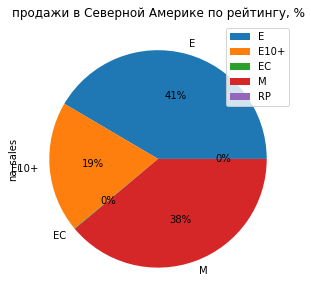

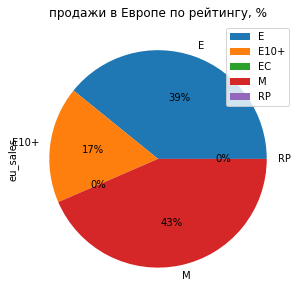

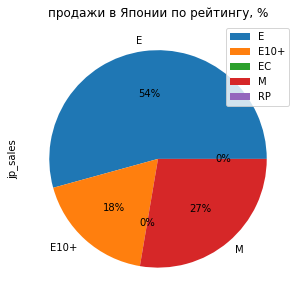

In [42]:
# Определим влияние рейтинга ESRB на продажи по регионам. Для этого отбросим пропущенные значения и сформируем сводную таблицу
data_games_rating = (
    data_games_period
    .dropna(subset=['rating'])
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
data_games_rating.head().plot(y='na_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
plt.title('продажи в Северной Америке по рейтингу, %')
data_games_rating.head().plot(y='eu_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
plt.title('продажи в Европе по рейтингу, %');
data_games_rating.head().plot(y='jp_sales', kind='pie', figsize=(5, 5), autopct='%i%%')
plt.title('продажи в Японии по рейтингу, %');

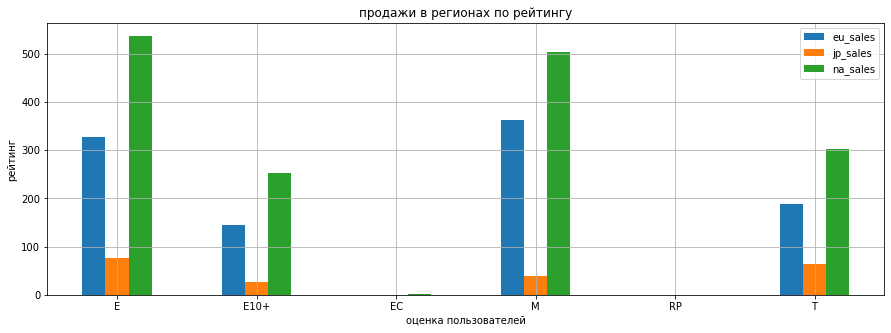

In [43]:
# Строим график продаж по регионам по каждому рейтингу
data_games_rating.plot(kind='bar', grid=True, figsize=(15, 5), title='продажи в регионах по рейтингу');
plt.xticks(rotation=0)
plt.xlabel('оценка пользователей')
plt.ylabel('рейтинг');

#### Вывод
Определили для пользователей регионов Северной Америки, Европы и Японии топ-5 самых популярных платформ. В Северной Америке самая популярная платформа X360, в Европе - PS3, в Японии - 3DS. Определили самые популярные жанры по регионам. В Северной Америке самый популярный жанр игр Action, в Европе - Action, в Японии - Role-Playing, на втором месте - Action. Возможно это связано с Японской культурой и любовью к персонажам аниме.
Построили график продаж по регионам по каждому рейтингу. Наиболее высокие продажи в  Японии и Северной Америке с рейтингом E, в Европе с рейтингом M.

## Шаг 5. Проверка гипотез <a id='section10'></a>

Проверим гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [44]:
# Делаем срез таблицы с играми по платформам PC и XOne
data_games_PC = data_games_period.query('platform == "PC"')
data_games_XOne = data_games_period.query('platform == "XOne"')

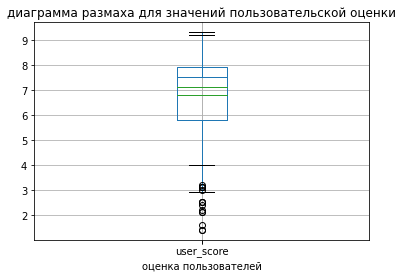

In [45]:
# Чтобы очистить данные от редких и выбивающихся значений
# Строим диаграммы размаха для значений пользовательской оценки
data_games_PC.boxplot('user_score');
data_games_XOne.boxplot('user_score')
plt.xlabel('оценка пользователей')
plt.title('диаграмма размаха для значений пользовательской оценки');

In [46]:
#Находим границы распределения значений пользовательской оценки, вычитая из среднего значения выборки 1,5 стандартных отклонения
A_PC = data_games_PC['user_score'].describe()['mean'] - data_games_PC['user_score'].describe()['std']*1.5
B_PC = data_games_PC['user_score'].describe()['mean'] + data_games_PC['user_score'].describe()['std']*1.5
A_XOne = data_games_XOne['user_score'].describe()['mean'] - data_games_XOne['user_score'].describe()['std']*1.5
B_XOne = data_games_XOne['user_score'].describe()['mean'] + data_games_XOne['user_score'].describe()['std']*1.5
print('A_PC =', A_PC, 'B_PC =', B_PC)
print('A_XOne =', A_XOne, 'B_XOne =', B_XOne)

A_PC = 4.411913971737755 B_PC = 9.023037484572935
A_XOne = 4.450017724540354 B_XOne = 8.592839418316785


In [47]:
# Делаем срез и формируем новые данные
data_games_PC = data_games_PC.query('@A_PC < user_score < @B_PC')
data_games_XOne = data_games_XOne.query('@A_XOne < user_score < @B_XOne')

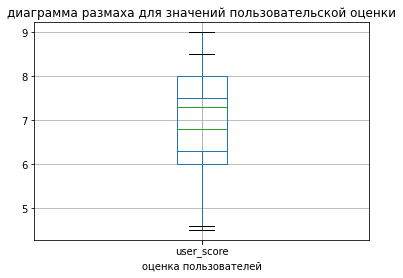

In [48]:
# Проверяем
data_games_PC.boxplot('user_score');
data_games_XOne.boxplot('user_score')
plt.xlabel('оценка пользователей')
plt.title('диаграмма размаха для значений пользовательской оценки');

In [49]:
# Смотрим статистические данные
print(data_games_PC['user_score'].describe())
data_games_XOne['user_score'].describe()

count    458.000000
mean       7.091703
std        1.088982
min        4.500000
25%        6.300000
50%        7.300000
75%        8.000000
max        9.000000
Name: user_score, dtype: float64


count    159.000000
mean       6.779874
std        0.945394
min        4.600000
25%        6.000000
50%        6.800000
75%        7.500000
max        8.500000
Name: user_score, dtype: float64

Так как данные о пользовательских оценках игр представлены только двумя разными выборками, то чтобы проверить гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC, сравним их средние значения с учетом дисперсии. Данные выборки независимы между собой, так как в этих оценку давали различные пользователи, распределены нормально, поэтому применим статистический тест t-тест, используя метод scipy.stats.ttest_ind (array1, array2, equal_var) для двух выборок.

In [50]:
# Имеем 2 выборки. Проверим гипотезу о равенстве их средних и сформулируем гипотезы так: 
# H0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# H1 = Средние пользовательские рейтинги платформ Xbox One и PC различаются
# equal_var = False, так как дисперсии выборок не равны
# Критический уровень статистической значимости 0.05
alpha = 0.05


results = st.ttest_ind(data_games_PC['user_score'], data_games_XOne['user_score'], equal_var = False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0006571080642348753
Отвергаем нулевую гипотезу


<a id='section11'></a>

In [51]:
# Делаем срез таблицы с играми по жанрам Action и Sports
data_games_action = data_games_period.query('genre == "Action"')
data_games_sports = data_games_period.query('genre == "Sports"')

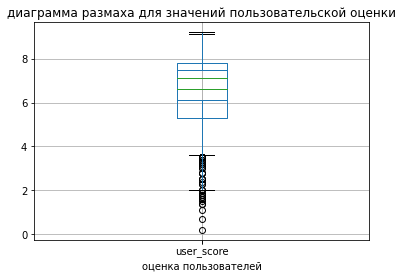

In [52]:
# Чтобы очистить данные от редких и выбивающихся значений
# Строим диаграммы размаха для значений пользовательской оценки
data_games_action.boxplot('user_score');
data_games_sports.boxplot('user_score')
plt.xlabel('оценка пользователей')
plt.title('диаграмма размаха для значений пользовательской оценки');

In [53]:
#Находим границы распределения значений пользовательской оценки, вычитая из среднего значения выборки 1,5 стандартных отклонения
A_ac = data_games_action['user_score'].describe()['mean'] - data_games_action['user_score'].describe()['std']*1.5
B_ac = data_games_action['user_score'].describe()['mean'] + data_games_action['user_score'].describe()['std']*1.5
A_sp = data_games_sports['user_score'].describe()['mean'] - data_games_sports['user_score'].describe()['std']*1.5
B_sp = data_games_sports['user_score'].describe()['mean'] + data_games_sports['user_score'].describe()['std']*1.5
print('A_ac =', A_ac, 'B_ac =', B_ac)
print('A_sp =', A_sp, 'B_sp =', B_sp)

A_ac = 4.841196615405351 B_ac = 8.86769227348357
A_sp = 3.649533907898306 B_sp = 8.782192999732224


In [54]:
# Делаем срез и формируем новые данные
data_games_action = data_games_action.query('@A_ac < user_score < @B_ac')
data_games_sports = data_games_sports.query('@A_sp < user_score < @B_sp')

In [55]:
# Смотрим статистические данные
print(data_games_action['user_score'].describe())
data_games_sports['user_score'].describe()

count    972.000000
mean       7.133848
std        0.957854
min        4.900000
25%        6.500000
50%        7.300000
75%        7.900000
max        8.800000
Name: user_score, dtype: float64


count    445.000000
mean       6.561124
std        1.265051
min        3.700000
25%        5.700000
50%        6.700000
75%        7.600000
max        8.700000
Name: user_score, dtype: float64

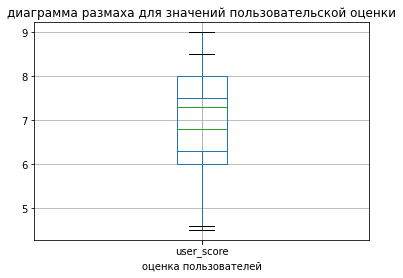

In [56]:
# Проверяем
data_games_PC.boxplot('user_score');
data_games_XOne.boxplot('user_score')
plt.xlabel('оценка пользователей')
plt.title('диаграмма размаха для значений пользовательской оценки');

Так как данные о пользовательских оценках игр представлены только двумя разными выборками, то чтобы проверить гипотезу о различии средних пользовательских рейтингов жанров Action и Sports, сравним их средние значения с учетом дисперсии. Данные выборки независимы между собой, так как в этих оценку давали различные пользователи, распределены нормально, поэтому применим статистический тест t-тест, используя метод scipy.stats.ttest_ind (array1, array2, equal_var) для двух выборок.
Основную гипотезу возьмем со знаком равенства средних

In [57]:
# Имеем 2 выборки. Проверим гипотезу о равенстве их средних и сформулируем гипотезы так: 
# H0 = Средние пользовательские рейтинги жанров Action и Sports одинаковые
# H1 = Средние пользовательские рейтинги жанров Action и Sports различаются
# equal_var = False, так как дисперсии выборок не равны
# Критический уровень статистической значимости 0.05
alpha = 0.05


results = st.ttest_ind(data_games_action['user_score'], data_games_sports['user_score'], equal_var = False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1817901472541873e-16
Отвергаем нулевую гипотезу


#### Вывод
Получили, что средние пользовательские рейтинги платформ Xbox One и PC различаются, и средние пользовательские рейтинги жанров Action и Sports различаются.

## Шаг 6. Общий вывод <a id='section12'></a>
* Проанализированы данные интернет-магазина «Стримчик» о продажах игр, оценках пользователей и экспертов, жанрах и платформ с 1980 до 2016 года. 
* Получили: в топ 5 самых прибыльных входят: PS2, X360, PS3, Wii и DS. Определен актуальный период, чтобы сделать прогноз на 2017 год, так как платформы появляются и исчезают примерно за 10 лет: с 2008 по 2016 год.
* Выявлено, что продажи на платформах PS3, X360, Wii, DS, PC, PSP, PS2, WiiU, PSV, XB и DC падают на 2016 год, а на платформах PS4, XOne и 3DS на 2016 год растут, поэтому, если учитывать, что они только набирают популярность, данные платформы являются потенциально прибыльными. C 2008 по 2013 год самыми прибыльными были платформы: Wii, PS3, X360.
* Выявлено, что на платформе Wii  самые дорогие продажи, но они встречаются редко. На платформе X360 много продаж со средней суммой ~ в 100 млн. долларов. На платформе PS3, которая лидирует по суммарным продажам игр, много продаж выше среднего. 
* В результате расчета корреляции получили прямую зависимость продаж от оценок, отзывы критиков влияют сильнее как внутри одной популярной платформы, так и для всех остальных платформ. По диаграммам рассеяния и графикам  также видно, что продажи игр возрастают с ростом оценки как внутри одной популярной платформы, так и для всех остальных платформ.
* Выявлено, что самый популярный жанр: Action.
* В Северной Америке самая популярная платформа X360, в Европе - PS3, в Японии - 3DS. В Северной Америке самый популярный жанр игр Action, в Европе - Action, в Японии - Role-Playing, на втором месте - Action. Возможно это связано с Японской культурой и любовью к персонажам аниме. Наиболее высокие продажи в Японии и Северной Америке с рейтингом E, в Европе с рейтингом M.
* В результате проверки гипотез получили, что средние пользовательские рейтинги платформ Xbox One и PC различаются, и средние пользовательские рейтинги жанров Action и Sports различаются.
* Закономерности, плученные в результате анализа, которые определяют успешность игры: жанр Action, рейтинг E и М, платформа PS4, XOne и 3DS, высокая оценка критиков, регион Северная Америка.
